# ANALYSE DES VENTES DE JEUX VIDEO

### Importation, nettoyage et traitements préliminaires

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np

In [2]:
#On importe les données dans un dataframe
df_vg_sales = pd.read_excel("VideoGame_Sales_1980-2016.xlsx", sheet_name="vgsales")

In [3]:
df_vg_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,Constructeur,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,Nintendo,Non,41.4900,27.8592,3.6569,8.2908,81.2969
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,Nintendo,Non,29.9524,3.4726,6.6738,0.8085,40.9073
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,Nintendo,Non,15.2160,12.4936,3.7900,3.3762,34.8758
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,Nintendo,Non,15.7500,11.0100,3.1816,3.0784,33.0200
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,Nintendo,Oui,11.2700,9.0678,9.8112,0.9900,31.1390


In [4]:
df_vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16545 entries, 0 to 16544
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16545 non-null  int64  
 1   Name          16545 non-null  object 
 2   Platform      16545 non-null  object 
 3   Year          16274 non-null  float64
 4   Genre         16545 non-null  object 
 5   Publisher     16487 non-null  object 
 6   Constructeur  16545 non-null  object 
 7   Portable      16545 non-null  object 
 8   NA_Sales      16545 non-null  float64
 9   EU_Sales      16545 non-null  float64
 10  JP_Sales      16545 non-null  float64
 11  Other_Sales   16545 non-null  float64
 12  Global_Sales  16545 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 1.6+ MB


In [5]:
print(df_vg_sales['Year'].unique())

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2004.
 2013. 1990. 1988. 2002. 2001. 2011. 1998. 2012. 2015. 2014. 1997. 1992.
 1993. 1994. 1982. 2003. 2000. 1986.   nan 1995. 2016. 1991. 1980. 1987.
 1981. 1983. 2020. 2017.]


In [6]:
# 1. Calculer la moyenne des années pour chaque plateforme
mean_years_by_platform = df_vg_sales.groupby('Platform')['Year'].mean().round()

# 2. Définir une fonction qui retourne la moyenne de la plateforme si l'année est manquante
def fill_year_by_platform(row):
    if pd.isnull(row['Year']):  # Vérifier si l'année est NaN
        return mean_years_by_platform.get(row['Platform'], row['Year'])  # Retourner la moyenne ou NaN si la plateforme est inconnue
    else:
        return row['Year']  # Si l'année n'est pas NaN, on la conserve telle quelle

# 3. Appliquer la fonction sur chaque ligne du dataframe
df_vg_sales['Year'] = df_vg_sales.apply(fill_year_by_platform, axis=1)

# 4. Afficher les premières lignes pour vérifier
df_vg_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,Constructeur,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,Nintendo,Non,41.4900,27.8592,3.6569,8.2908,81.2969
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,Nintendo,Non,29.9524,3.4726,6.6738,0.8085,40.9073
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,Nintendo,Non,15.2160,12.4936,3.7900,3.3762,34.8758
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,Nintendo,Non,15.7500,11.0100,3.1816,3.0784,33.0200
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,Nintendo,Oui,11.2700,9.0678,9.8112,0.9900,31.1390


In [7]:
print(df_vg_sales['Year'].unique())

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2004.
 2013. 1990. 1988. 2002. 2001. 2011. 1998. 2012. 2015. 2014. 1997. 1992.
 1993. 1994. 1982. 2003. 2000. 1986. 1995. 2016. 1991. 1980. 1987. 1981.
 1983. 2020. 2017.]


In [8]:
# Conversion de la colonne Year en entier
df_vg_sales['Year'] = df_vg_sales['Year'].astype(int)

In [9]:
# Vérification des colonnes
print(df_vg_sales.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'Constructeur', 'Portable ', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales'],
      dtype='object')


In [10]:
# Renommer la colonne 'Portable ' en 'Portable' (sans espace)
df_vg_sales.rename(columns={'Portable ': 'Portable'}, inplace=True)

# Vérifier si le renommage a bien fonctionné
print(df_vg_sales.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'Constructeur', 'Portable', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales'],
      dtype='object')


In [11]:
print(df_vg_sales['Platform'].unique())
print('_'*25)
print(df_vg_sales['Genre'].unique())
print('_'*25)
print(df_vg_sales['Constructeur'].unique())
print('_'*25)
print(df_vg_sales['Portable'].unique())
print('_'*25)

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS2' 'PS3' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PSP' 'PC' 2600 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT' '3DO'
 'GG']
_________________________
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
_________________________
['Nintendo' 'Microsoft' 'Sony' 'PC' 'Atati' 'Sega' 'Dreamcast' 'Saturne'
 '3DO' 'Game Gear']
_________________________
['Non' 'Oui' 'oUI']
_________________________


In [12]:
# Remplacer 'oUI' par 'Oui' dans la colonne 'Portable'
df_vg_sales['Portable'] = df_vg_sales['Portable'].replace('oUI', 'Oui')

# Vérifier les valeurs uniques après la correction
print(df_vg_sales['Portable'].unique())

['Non' 'Oui']


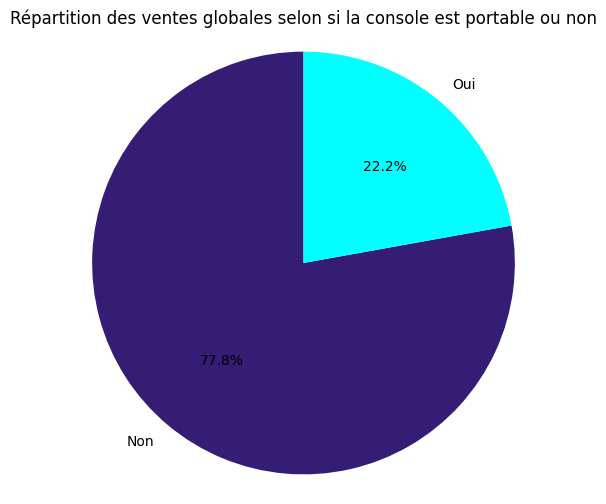

In [13]:
import matplotlib.pyplot as plt

# Étape 1 : Grouper les données par la colonne 'Portable' et additionner les ventes totales
ventes_portable = df_vg_sales.groupby('Portable')['Global_Sales'].sum()

# Étape 2 : Créer le graphique en secteur
labels = ventes_portable.index  # Les étiquettes ('Oui' ou 'Non')
sizes = ventes_portable.values  # Les valeurs des ventes totales pour chaque groupe

# Dessiner le graphique
plt.figure(figsize=(6, 6))  # Taille du graphique
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#351c75', '#00ffff'])
plt.title("Répartition des ventes globales selon si la console est portable ou non")
plt.axis('equal')  # Assure que le graphique est bien circulaire
plt.show()

In [14]:
df_vg_sales['Constructeur'] = df_vg_sales['Constructeur'].replace('Atati', 'Atari')

# Vérifier les valeurs uniques après la correction
print(df_vg_sales['Constructeur'].unique())

['Nintendo' 'Microsoft' 'Sony' 'PC' 'Atari' 'Sega' 'Dreamcast' 'Saturne'
 '3DO' 'Game Gear']


### Analyses des genres de jeux vidéo

In [15]:
df_vg_sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16545.000000,16545.000000,16545.000000,16545.000000,16545.000000,16545.000000,16545.000000
mean,8289.703959,2006.403868,0.269274,0.150565,0.078359,0.049447,0.547645
std,4791.589155,5.836854,0.863085,0.572444,0.311484,0.216729,1.684157
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4140.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060500
50%,8285.000000,2007.000000,0.079200,0.020800,0.000000,0.010100,0.172800
75%,12436.000000,2010.000000,0.241500,0.112200,0.038400,0.038400,0.480300
max,16600.000000,2020.000000,41.490000,27.859200,9.811200,12.098600,81.296900


In [16]:
gen = df_vg_sales['Genre'].value_counts()
gen

Genre
Action          3313
Sports          2345
Misc            1737
Role-Playing    1482
Shooter         1309
Adventure       1262
Racing          1248
Platform         885
Simulation       867
Fighting         837
Strategy         678
Puzzle           582
Name: count, dtype: int64

In [17]:
Genre = pd.DataFrame({'Genre':gen.index,'Count': gen})
Genre = Genre.set_index('Genre', drop=True)
Genre

,Count
Genre,
Action,3313
Sports,2345
Misc,1737
Role-Playing,1482
Shooter,1309
Adventure,1262
Racing,1248
Platform,885
Simulation,867


### Analyses des consoles et constructeurs

In [18]:
platfrm = df_vg_sales['Platform'].value_counts()
platfrm

Platform
DS      2163
PS2     2160
Wii     1325
PS3     1323
X360    1259
PSP     1209
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      406
PS4      334
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
3DO        3
GG         1
Name: count, dtype: int64

In [19]:
platform = pd.DataFrame({'Platform':platfrm.index,'Count': platfrm})
platform = platform.set_index('Platform', drop=True)
platform

,Count
Platform,
DS,2163
PS2,2160
Wii,1325
PS3,1323
X360,1259
PSP,1209
PS,1196
PC,960
XB,824


In [20]:
construc = df_vg_sales['Constructeur'].value_counts()
construc

Constructeur
Sony         6628
Nintendo     6272
Microsoft    2296
PC            960
Saturne       173
Atari         133
Dreamcast      52
Sega           27
3DO             3
Game Gear       1
Name: count, dtype: int64

In [21]:
constructeur = pd.DataFrame({'Constructeur':construc.index,'Count': construc})
constructeur = constructeur.set_index('Constructeur', drop=True)
constructeur

,Count
Constructeur,
Sony,6628
Nintendo,6272
Microsoft,2296
PC,960
Saturne,173
Atari,133
Dreamcast,52
Sega,27
3DO,3


In [22]:
# Liste des colonnes de ventes
sales_cols = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]

In [23]:
constructeur_sales = df_vg_sales.groupby('Constructeur')[sales_cols].sum()
constructeur_sales = constructeur_sales.sort_values(by='Global_Sales', ascending=False)
constructeur_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Constructeur,,,,,
Sony,1562.1827,1140.7937,476.4038,484.7952,3664.1754
Nintendo,1783.5620,790.1832,762.1287,195.6025,3531.4764
Microsoft,898.5060,404.8112,14.0361,110.3013,1427.6546
PC,94.8780,141.9871,0.1712,25.2679,262.3042
Atari,90.6153,5.5047,0.0000,0.9171,97.0371
Saturne,0.7090,0.5390,32.2494,0.0702,33.5676
Sega,19.2414,5.5329,2.6792,0.8852,28.3387
Dreamcast,5.4397,1.7496,8.6379,0.2657,16.0929
3DO,0.0000,0.0000,0.1018,0.0000,0.1018


C:\Users\mat_h\AppData\Local\Temp\ipykernel_20448\2786027221.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(constructeur_sales.index, rotation=90)


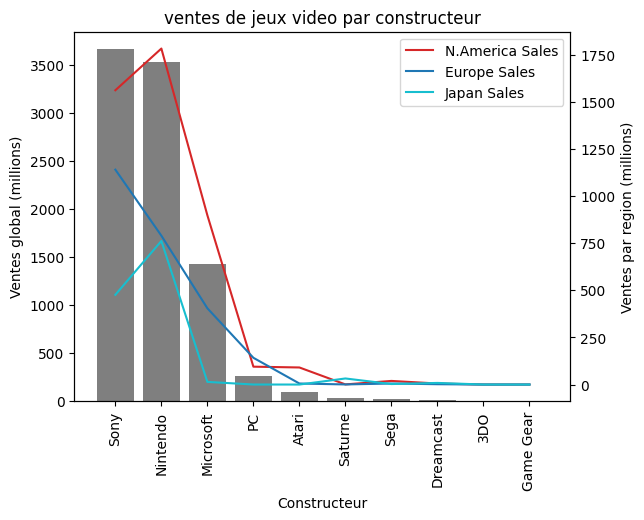

In [24]:
fig, ax1 = plt.subplots()

# Bar graph for global sales
ax1.bar(constructeur_sales.index, constructeur_sales['Global_Sales'], color='tab:grey')
ax1.set_xlabel('Constructeur')
ax1.set_ylabel('Ventes global (millions)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Line graphs for regional sales
ax2 = ax1.twinx()
ax2.plot(constructeur_sales.index, constructeur_sales['NA_Sales'], color='tab:red', label='N.America Sales')
ax2.plot(constructeur_sales.index, constructeur_sales['EU_Sales'], color='tab:blue', label='Europe Sales')
ax2.plot(constructeur_sales.index, constructeur_sales['JP_Sales'], color='tab:cyan', label='Japan Sales')
ax2.set_ylabel('Ventes par region (millions)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax1.set_xticklabels(constructeur_sales.index, rotation=90)

# Add a legend to the chart
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.title('ventes de jeux video par constructeur')
plt.show()

In [25]:
Platform_sales = df_vg_sales.groupby('Platform')[sales_cols].sum()
Platform_sales = Platform_sales.sort_values(by='Global_Sales', ascending=False)
Platform_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,586.1000,340.9652,140.3691,194.4819,1261.9162
X360,621.9389,293.5538,12.3175,88.5628,1016.3730
PS3,406.9458,364.4404,82.4446,150.9316,1004.7624
Wii,508.8321,268.2849,69.4771,81.1875,927.7816
DS,392.1311,194.9440,176.9723,61.1163,825.1637
PS,337.6760,214.4653,140.6483,41.0980,733.8876
GBA,188.3509,75.7822,47.6206,7.7923,319.5460
PS4,105.5771,135.9887,14.8128,47.5403,303.9189
PSP,109.7888,68.6339,77.1829,42.3411,297.9467


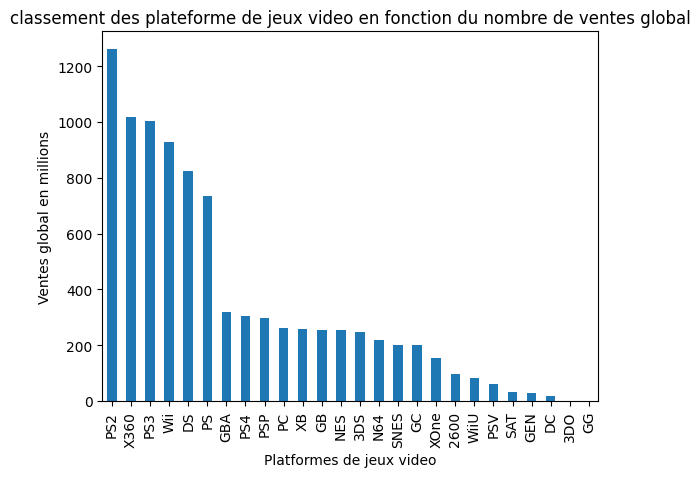

In [26]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
Platform_sales.plot(kind='bar',y='Global_Sales', legend=False)
plt.ylabel('Ventes global en millions')
plt.xlabel('Platformes de jeux video')
plt.title('classement des plateforme de jeux video en fonction du nombre de ventes global')
handles = [plt.Rectangle((0,0),1,1) for i in range(len(Platform_sales))]
plt.show()

### Analyse des genres de jeux

In [27]:
Genre_sales = df_vg_sales.groupby('Genre')[sales_cols].sum()
Genre_sales = Genre_sales.sort_values(by='Global_Sales', ascending=False)
Genre_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,926.4290,575.8090,163.5549,204.6861,1870.4790
Sports,684.8693,377.8736,136.4241,135.8755,1335.0425
Shooter,586.3094,314.8729,38.2339,102.8114,1042.2276
Role-Playing,329.5338,189.0062,354.3499,59.7687,932.6586
Platform,446.5510,202.2651,130.5823,52.1227,831.5211
Misc,413.5053,216.4458,107.8913,75.6755,813.5179
Racing,360.5761,239.2042,56.5835,77.5241,733.8879
Fighting,224.0432,101.7961,86.3600,36.8610,449.0603
Simulation,184.4192,112.7183,64.5886,31.9120,393.6381


C:\Users\mat_h\AppData\Local\Temp\ipykernel_20448\4068000829.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Genre_sales.index, rotation=90)


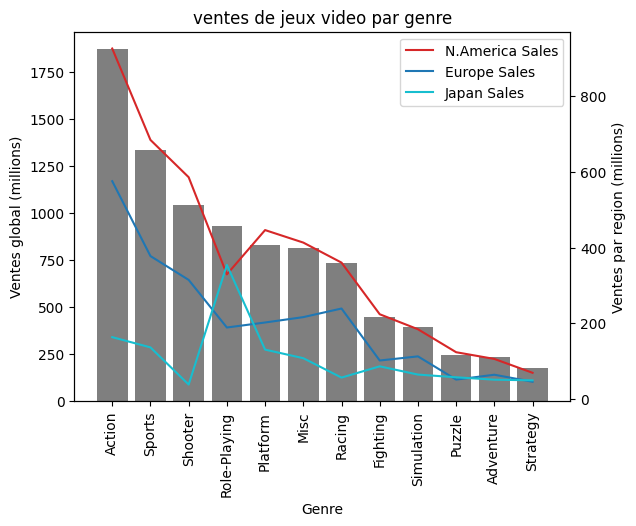

In [28]:
fig, ax1 = plt.subplots()

# Bar graph for global sales
ax1.bar(Genre_sales.index, Genre_sales['Global_Sales'], color='tab:grey')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Ventes global (millions)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Line graphs for regional sales
ax2 = ax1.twinx()
ax2.plot(Genre_sales.index, Genre_sales['NA_Sales'], color='tab:red', label='N.America Sales')
ax2.plot(Genre_sales.index, Genre_sales['EU_Sales'], color='tab:blue', label='Europe Sales')
ax2.plot(Genre_sales.index, Genre_sales['JP_Sales'], color='tab:cyan', label='Japan Sales')
ax2.set_ylabel('Ventes par region (millions)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax1.set_xticklabels(Genre_sales.index, rotation=90)

# Add a legend to the chart
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.title('ventes de jeux video par genre')
plt.show()

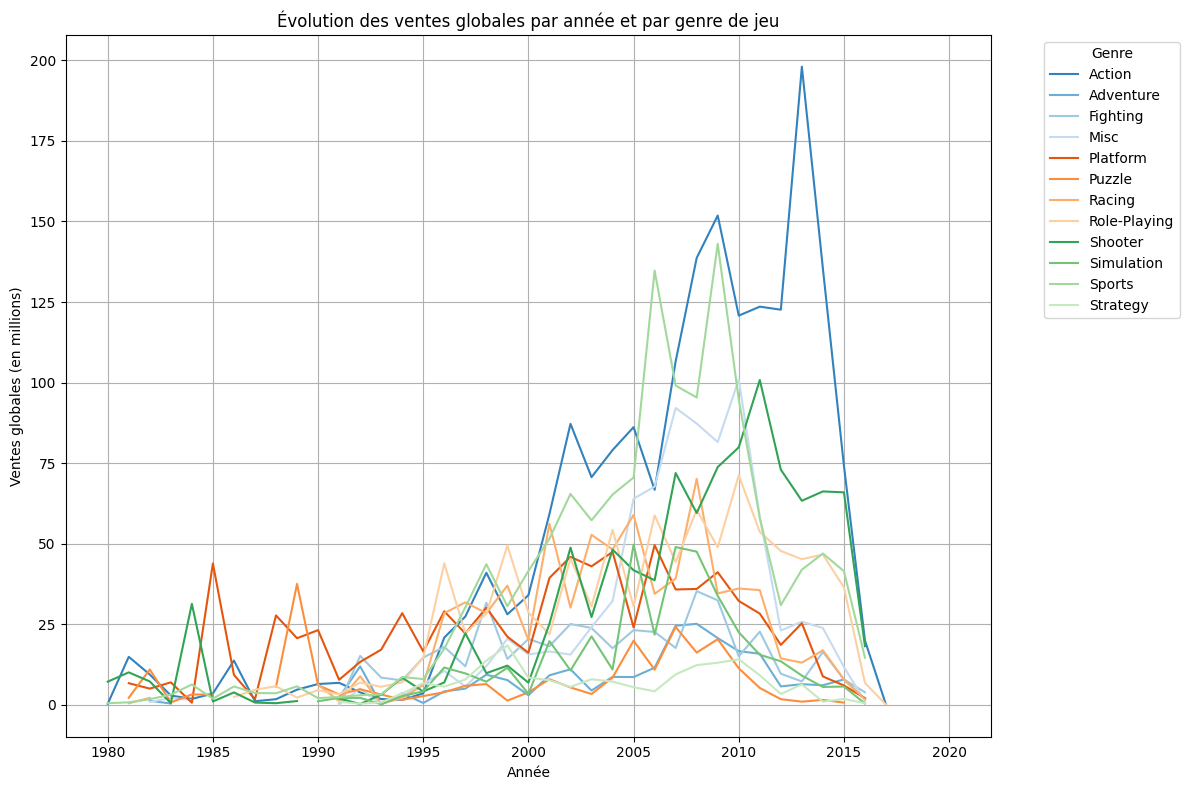

In [29]:
# Étape 1 : Filtrer les lignes où Year est égal à 0
df_filtered = df_vg_sales[df_vg_sales['Year'] != 0]

# Étape 2 : Grouper les données par 'Year' et 'Genre', et additionner les ventes
ventes_par_genre = df_filtered.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack()

# Étape 3 : Tracer le graphique en courbe
plt.figure(figsize=(12, 8))

# Couleurs pour les 12 genres
colors = plt.cm.tab20c.colors

# Tracer chaque genre avec une courbe différente
for i, genre in enumerate(ventes_par_genre.columns):
    plt.plot(ventes_par_genre.index, ventes_par_genre[genre], label=genre, color=colors[i % len(colors)])

# Ajouter les labels et la légende
plt.title("Évolution des ventes globales par année et par genre de jeu")
plt.xlabel("Année")
plt.ylabel("Ventes globales (en millions)")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Afficher le graphique
plt.tight_layout()  # Ajuste le graphique pour éviter le chevauchement des éléments
plt.show()

### Analyse ventes de jeux par années

In [30]:
year_sales = df_vg_sales.groupby('Year')[sales_cols].sum().sort_values(by='Global_Sales', ascending=False)
year_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
2009,352.7877,200.1558,64.1992,78.1626,695.3053
2008,354.5761,185.2392,61.2513,82.9473,684.0139
2010,313.6204,180.9258,60.0147,61.1332,615.6941
2007,313.6934,161.5587,60.5251,78.1244,613.9016
2011,245.8641,171.4637,53.8062,55.6541,526.7881
2006,264.4590,128.3389,74.2782,54.6134,521.6895
2005,254.1148,128.7026,56.2301,43.8345,482.8820
2013,185.7915,156.2318,49.7330,51.0643,442.8206
2004,228.2735,109.2832,42.1360,47.9221,427.6148


### analyse des éditeurs de jeux

In [31]:
df_vg_sales['Publisher'].nunique()

577

In [32]:
publish = df_vg_sales['Publisher'].value_counts().nlargest(10)
publisher = pd.DataFrame({'Publisher':publish.index,'Count': publish})
publisher = publisher.set_index('Publisher', drop=True)
publisher

,Count
Publisher,
Electronic Arts,1351
Activision,975
Namco Bandai Games,928
Ubisoft,921
Konami Digital Entertainment,832
THQ,715
Nintendo,703
Sony Computer Entertainment,683
Sega,633


In [33]:
# Liste des 10 plus gros producteurs de jeux vidéo
top_publishers = publish.index

# Filtrer le DataFrame pour ne garder que les jeux des top publishers
df_vg_top_publisher = df_vg_sales[df_vg_sales['Publisher'].isin(top_publishers)]

# Réinitialiser l'index du DataFrame filtré
df_vg_top_publisher.reset_index(drop=True, inplace=True)

# Afficher les premières lignes du DataFrame filtré
df_vg_top_publisher.head()

,Rank,Name,Platform,Year,Genre,Publisher,Constructeur,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,Nintendo,Non,41.4900,27.8592,3.6569,8.2908,81.2969
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,Nintendo,Non,29.9524,3.4726,6.6738,0.8085,40.9073
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,Nintendo,Non,15.2160,12.4936,3.7900,3.3762,34.8758
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,Nintendo,Non,15.7500,11.0100,3.1816,3.0784,33.0200
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,Nintendo,Oui,11.2700,9.0678,9.8112,0.9900,31.1390


In [34]:
print(df_vg_top_publisher['Publisher'].unique())

['Nintendo' 'Take-Two Interactive' 'Sony Computer Entertainment'
 'Activision' 'Ubisoft' 'Electronic Arts' 'Sega'
 'Konami Digital Entertainment' 'Namco Bandai Games' 'THQ']


In [35]:
Top_Genre_sales = df_vg_top_publisher.groupby('Genre')[sales_cols].sum()
Top_Genre_sales = Top_Genre_sales.sort_values(by='Global_Sales', ascending=False)
Top_Genre_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,577.9195,374.6691,88.5088,140.2093,1181.3067
Sports,570.9953,330.4355,116.9268,122.3560,1140.7136
Shooter,411.4967,239.7651,29.7218,80.8874,761.8710
Platform,379.3570,171.3028,119.4931,44.7645,714.9174
Misc,267.0092,160.7010,81.9634,55.9300,565.6036
Racing,265.4655,160.6385,49.3714,58.0512,533.5266
Role-Playing,199.7359,123.6252,166.3519,31.4615,521.1745
Simulation,132.7674,88.0759,46.7081,24.5446,292.0960
Fighting,133.1870,67.1551,50.5220,23.8336,274.6977


C:\Users\mat_h\AppData\Local\Temp\ipykernel_20448\3773572035.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Top_Genre_sales.index, rotation=90)


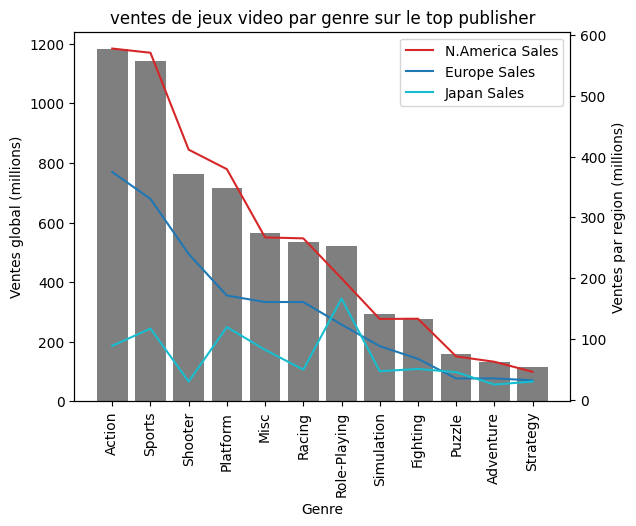

In [36]:
fig, ax1 = plt.subplots()

# Bar graph for global sales
ax1.bar(Top_Genre_sales.index, Top_Genre_sales['Global_Sales'], color='tab:grey')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Ventes global (millions)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Line graphs for regional sales
ax2 = ax1.twinx()
ax2.plot(Top_Genre_sales.index, Top_Genre_sales['NA_Sales'], color='tab:red', label='N.America Sales')
ax2.plot(Top_Genre_sales.index, Top_Genre_sales['EU_Sales'], color='tab:blue', label='Europe Sales')
ax2.plot(Top_Genre_sales.index, Top_Genre_sales['JP_Sales'], color='tab:cyan', label='Japan Sales')
ax2.set_ylabel('Ventes par region (millions)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax1.set_xticklabels(Top_Genre_sales.index, rotation=90)

# Add a legend to the chart
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.title('ventes de jeux video par genre sur le top publisher')
plt.show()

In [37]:
top_construc = df_vg_top_publisher['Constructeur'].value_counts()
top_construc

Constructeur
Sony         3234
Nintendo     3171
Microsoft    1163
PC            411
Saturne        90
Dreamcast      35
Atari          29
Sega           19
3DO             1
Game Gear       1
Name: count, dtype: int64

In [38]:
top_constructeur = pd.DataFrame({'Constructeur':top_construc.index,'Count': top_construc})
top_constructeur = top_constructeur.set_index('Constructeur', drop=True)
top_constructeur

,Count
Constructeur,
Sony,3234
Nintendo,3171
Microsoft,1163
PC,411
Saturne,90
Dreamcast,35
Atari,29
Sega,19
3DO,1


In [39]:
top_constructeur_sales = df_vg_top_publisher.groupby('Constructeur')[sales_cols].sum()
top_constructeur_sales = top_constructeur_sales.sort_values(by='Global_Sales', ascending=False)
top_constructeur_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Constructeur,,,,,
Nintendo,1354.8139,643.6270,562.7775,154.8979,2716.1163
Sony,1104.5632,819.4789,252.4613,364.0391,2540.5425
Microsoft,564.9829,253.4898,5.1315,70.0857,893.6899
PC,55.9421,94.2123,0.0000,17.4168,167.5712
Saturne,0.7090,0.5390,20.0103,0.0702,21.3285
Atari,18.5281,1.0938,0.0000,0.2025,19.8244
Sega,12.6483,3.8796,2.2795,0.6225,19.4299
Dreamcast,5.0092,1.5081,6.5722,0.2366,13.3261
3DO,0.0000,0.0000,0.0606,0.0000,0.0606


C:\Users\mat_h\AppData\Local\Temp\ipykernel_20448\957521817.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_constructeur_sales.index, rotation=90)


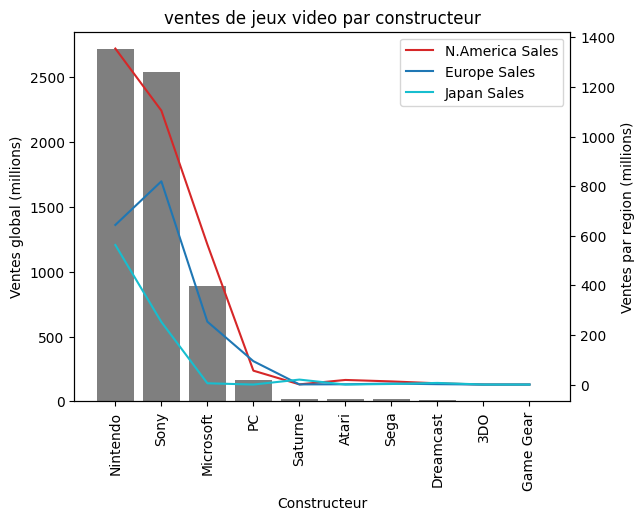

In [40]:
fig, ax1 = plt.subplots()

# Bar graph for global sales
ax1.bar(top_constructeur_sales.index, top_constructeur_sales['Global_Sales'], color='tab:grey')
ax1.set_xlabel('Constructeur')
ax1.set_ylabel('Ventes global (millions)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Line graphs for regional sales
ax2 = ax1.twinx()
ax2.plot(top_constructeur_sales.index, top_constructeur_sales['NA_Sales'], color='tab:red', label='N.America Sales')
ax2.plot(top_constructeur_sales.index, top_constructeur_sales['EU_Sales'], color='tab:blue', label='Europe Sales')
ax2.plot(top_constructeur_sales.index, top_constructeur_sales['JP_Sales'], color='tab:cyan', label='Japan Sales')
ax2.set_ylabel('Ventes par region (millions)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax1.set_xticklabels(top_constructeur_sales.index, rotation=90)

# Add a legend to the chart
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.title('ventes de jeux video par constructeur')
plt.show()

### Analyses sur les constructeurs ayant des consoles en ventes actuellement

In [41]:
df_vgames_2013 = df_vg_sales[(df_vg_sales['Year'] >= 2013) & (df_vg_sales['Year'] <= 2016) & (df_vg_sales['Constructeur'].isin(['Nintendo', 'Sony','Microsoft']))]

df_vgames_2013.head()

,Rank,Name,Platform,Year,Genre,Publisher,Constructeur,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,Sony,Non,18.7296,27.6408,2.9506,12.0986,61.4196
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,Microsoft,Non,27.6300,16.4162,0.1594,4.3386,48.5442
32,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,Nintendo,Oui,5.3768,4.0905,4.2098,0.8058,14.4829
34,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,Sony,Non,5.7700,5.5776,0.3395,2.2407,13.9278
42,45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,Sony,Non,11.8380,18.1005,0.9456,6.0604,36.9445


In [42]:
Genre_sales_2013 = df_vgames_2013.groupby('Genre')[sales_cols].sum()
Genre_sales_2013 = Genre_sales_2013.sort_values(by='Global_Sales', ascending=False)
Genre_sales_2013

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,163.5958,158.9784,41.6927,53.2352,417.5021
Shooter,97.1573,75.9040,6.0676,25.3930,204.5219
Sports,62.2519,56.5188,5.2873,19.0222,143.0802
Role-Playing,40.0549,31.6866,48.2667,10.3611,130.3693
Misc,26.7924,19.9718,8.9288,6.1607,61.8537
Platform,17.9633,15.4525,4.6690,4.0592,42.1440
Racing,12.5593,19.0247,2.3394,4.7004,38.6238
Fighting,15.4847,8.5136,7.6791,3.7144,35.3918
Adventure,6.6245,7.3923,5.3500,2.3704,21.7372


C:\Users\mat_h\AppData\Local\Temp\ipykernel_20448\1164533078.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Genre_sales_2013.index, rotation=90)


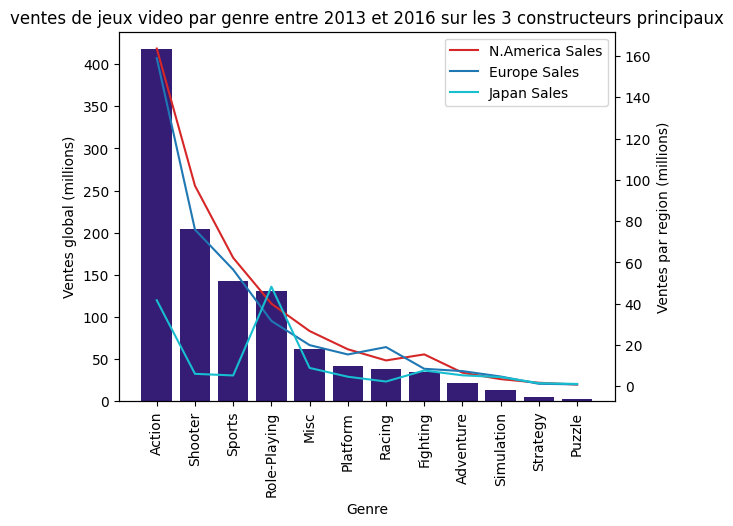

In [43]:
fig, ax1 = plt.subplots()

# Bar graph for global sales
ax1.bar(Genre_sales_2013.index, Genre_sales_2013['Global_Sales'], color='#351c75')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Ventes global (millions)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Line graphs for regional sales
ax2 = ax1.twinx()
ax2.plot(Genre_sales_2013.index, Genre_sales_2013['NA_Sales'], color='tab:red', label='N.America Sales')
ax2.plot(Genre_sales_2013.index, Genre_sales_2013['EU_Sales'], color='tab:blue', label='Europe Sales')
ax2.plot(Genre_sales_2013.index, Genre_sales_2013['JP_Sales'], color='tab:cyan', label='Japan Sales')
ax2.set_ylabel('Ventes par region (millions)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax1.set_xticklabels(Genre_sales_2013.index, rotation=90)

# Add a legend to the chart
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.title('ventes de jeux video par genre entre 2013 et 2016 sur les 3 constructeurs principaux')
plt.show()

In [44]:
# Compter les occurrences de chaque genre et les trier en ordre décroissant
genres_ordres = df_vgames_2013['Genre'].value_counts()

# Afficher la liste des genres dans l'ordre décroissant
print(genres_ordres)

Genre
Action          663
Role-Playing    264
Adventure       203
Sports          198
Shooter         144
Misc            137
Fighting         76
Platform         69
Racing           68
Simulation       39
Strategy         35
Puzzle           17
Name: count, dtype: int64


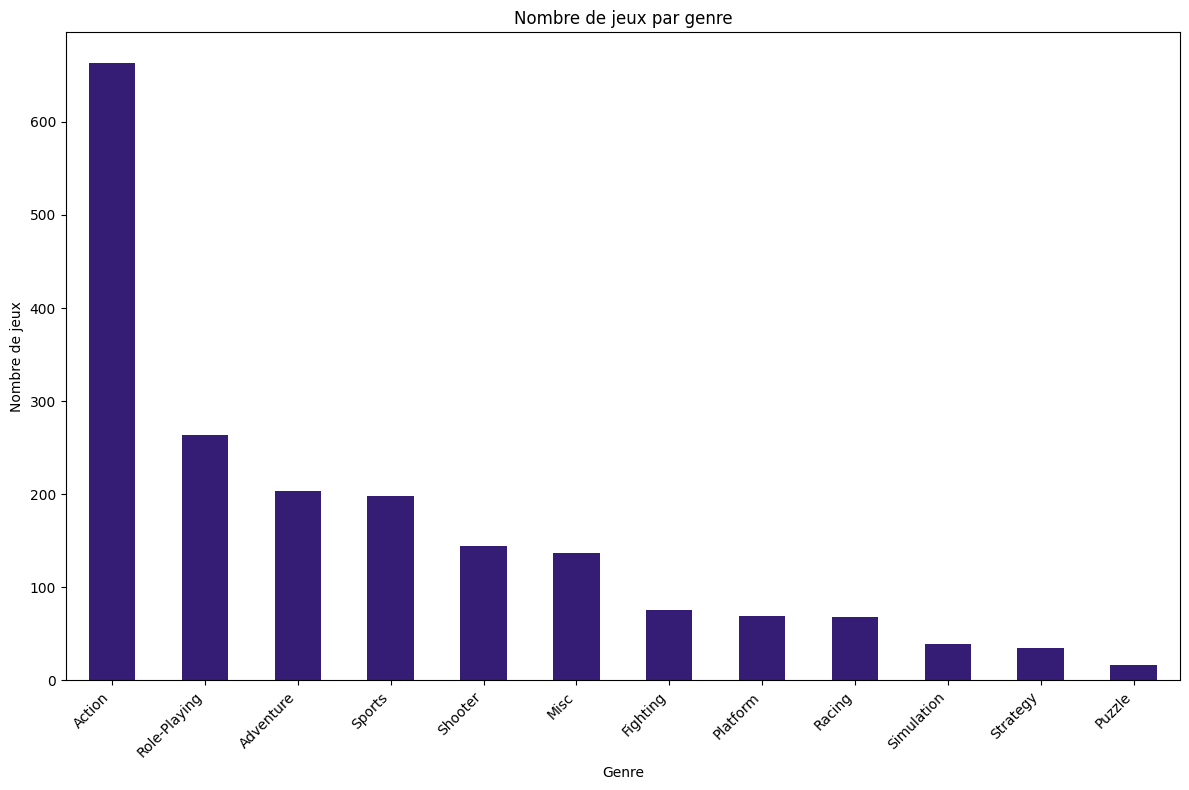

In [45]:
# Tracer l'histogramme de la moyenne des suggestions par genre
plt.figure(figsize=(12, 8))
genres_ordres.plot(kind='bar', color='#351c75')

# Ajouter des labels et un titre
plt.title("Nombre de jeux par genre")
plt.xlabel("Genre")
plt.ylabel("Nombre de jeux")
plt.xticks(rotation=45, ha='right')  # Rotation des noms de genres pour lisibilité

# Afficher le graphique
plt.tight_layout()  # Ajustement pour éviter le chevauchement des éléments
plt.show()

### Analyses des ventes pour les constructeur et genres choisi pour notre develloppement de jeu

In [46]:
# Filtrer pour les genres et constructeurs spécifiques
df_filtered = df_vgames_2013[df_vgames_2013['Genre'].isin(['Action', 'Adventure', 'Shooter']) &
                            df_vgames_2013['Constructeur'].isin(['Sony', 'Nintendo'])]

# Calculer la moyenne des ventes par genre et constructeur
sales_means = df_filtered.groupby(['Genre', 'Constructeur'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()
print(sales_means)  # Afficher le résultat pour vérification

                        NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Genre     Constructeur                                              
Action    Nintendo      0.105698  0.080685  0.102121     0.018155   
          Sony          0.206843  0.279084  0.066305     0.108114   
Adventure Nintendo      0.024978  0.028506  0.061675     0.005078   
          Sony          0.024511  0.029691  0.022462     0.012268   
Shooter   Nintendo      0.212780  0.152030  0.146330     0.050280   
          Sony          0.613291  0.712170  0.062901     0.261961   

                        Global_Sales  
Genre     Constructeur                
Action    Nintendo          0.306659  
          Sony              0.660346  
Adventure Nintendo          0.120238  
          Sony              0.088933  
Shooter   Nintendo          0.561420  
          Sony              1.650324  


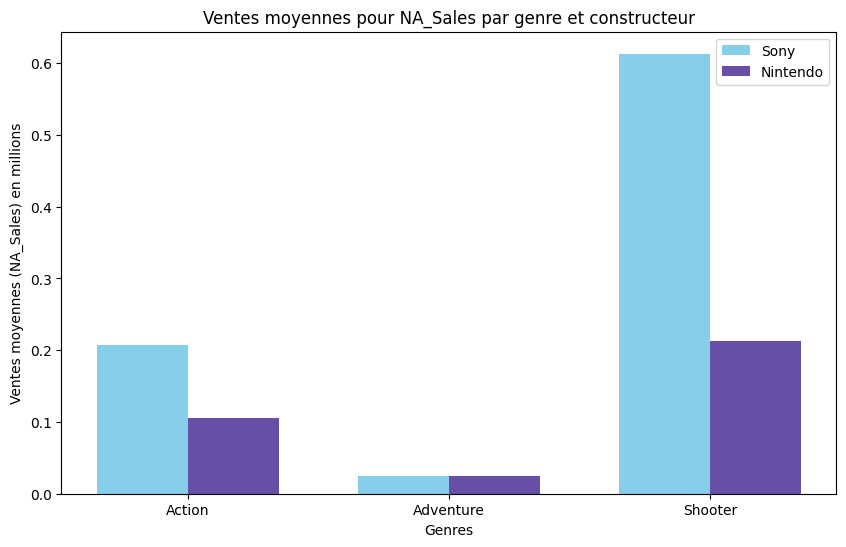

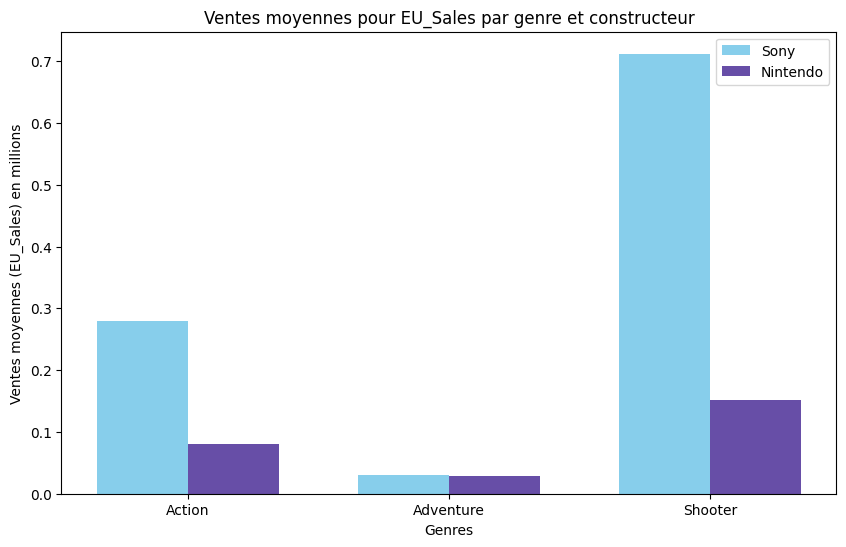

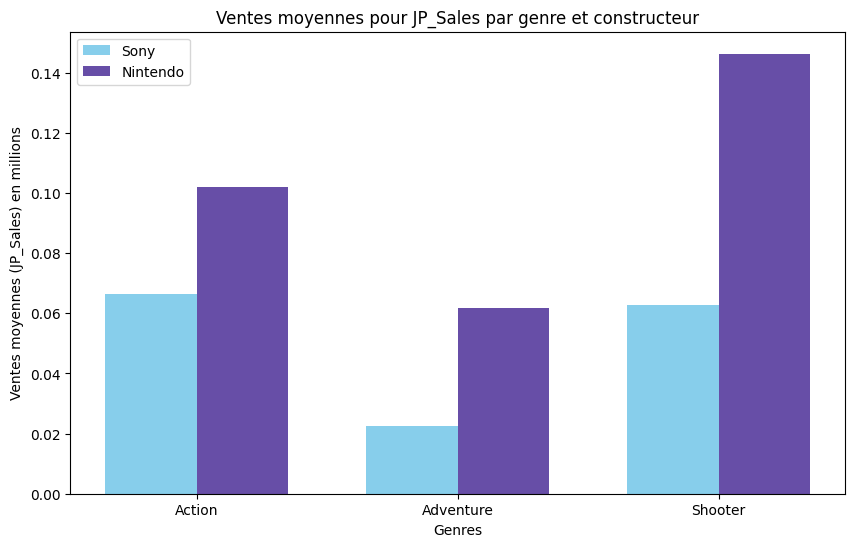

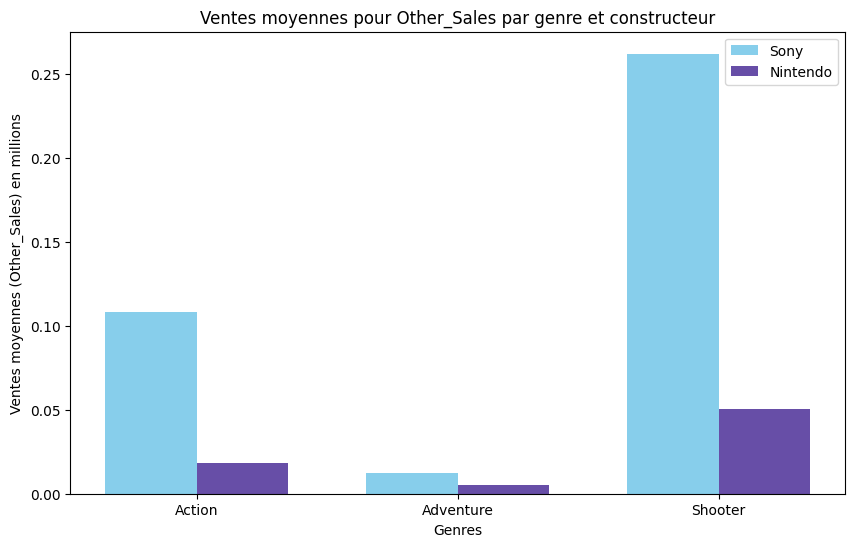

In [47]:
# Définir les genres et les constructeurs pour l'axe x
genres = ['Action', 'Adventure', 'Shooter']
constructeurs = ['Sony', 'Nintendo']
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Boucler sur chaque type de vente
for sales_type in sales_columns:
    # Créer une figure pour chaque type de vente
    plt.figure(figsize=(10, 6))
    index = np.arange(len(genres))
    bar_width = 0.35
    
    # Séparer les moyennes pour Sony et Nintendo
    sales_sony = [sales_means.loc[(genre, 'Sony'), sales_type] for genre in genres]
    sales_nintendo = [sales_means.loc[(genre, 'Nintendo'), sales_type] for genre in genres]

    # Barres pour Sony et Nintendo
    plt.bar(index, sales_sony, bar_width, label='Sony', color='skyblue')
    plt.bar(index + bar_width, sales_nintendo, bar_width, label='Nintendo', color='#674ea7')

    # Paramètres du graphique
    plt.xlabel('Genres')
    plt.ylabel(f'Ventes moyennes ({sales_type}) en millions')
    plt.title(f'Ventes moyennes pour {sales_type} par genre et constructeur')
    plt.xticks(index + bar_width / 2, genres)
    plt.legend()
    plt.show()

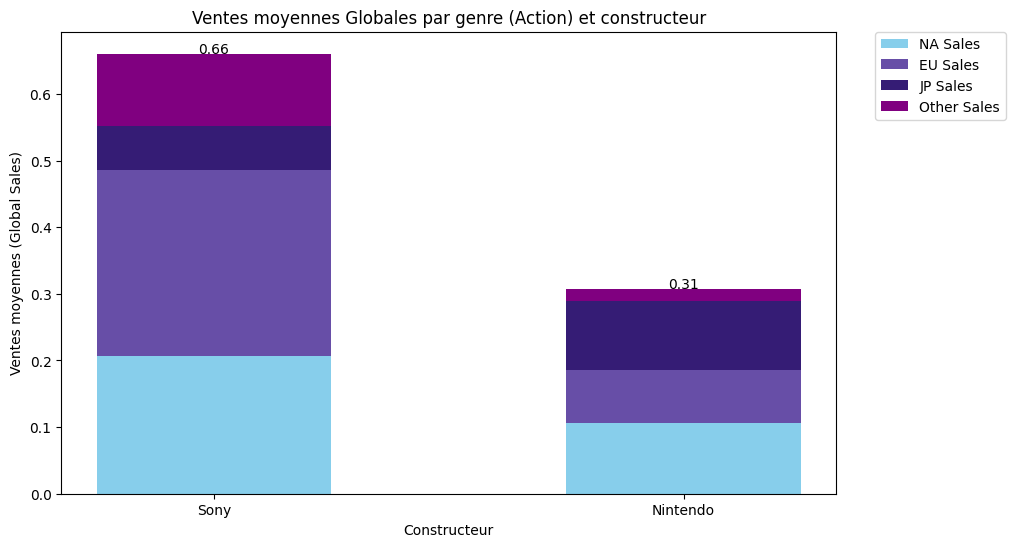

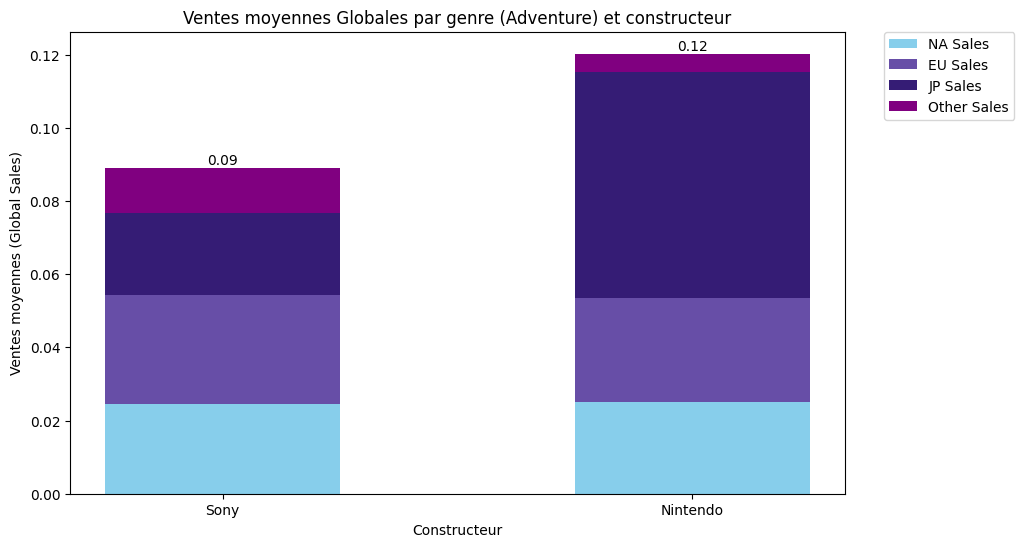

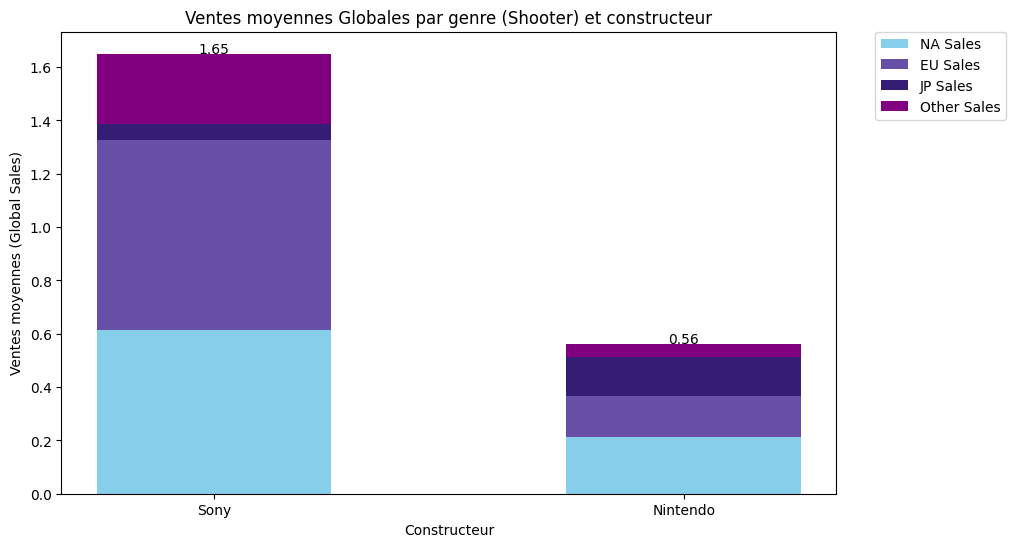

In [48]:
for genre in genres:
    # Créer une figure pour Global_Sales avec sections empilées
    plt.figure(figsize=(10, 6))
    index = np.arange(len(constructeurs))
    bar_width = 0.5
    
    # Récupérer les moyennes des ventes régionales pour chaque constructeur et chaque genre
    na_sales = [sales_means.loc[(genre, constructeur), 'NA_Sales'] for constructeur in constructeurs]
    eu_sales = [sales_means.loc[(genre, constructeur), 'EU_Sales'] for constructeur in constructeurs]
    jp_sales = [sales_means.loc[(genre, constructeur), 'JP_Sales'] for constructeur in constructeurs]
    other_sales = [sales_means.loc[(genre, constructeur), 'Other_Sales'] for constructeur in constructeurs]
    
    # Sections empilées
    plt.bar(index, na_sales, bar_width, label='NA Sales', color='skyblue')
    plt.bar(index, eu_sales, bar_width, bottom=na_sales, label='EU Sales', color='#674ea7')
    plt.bar(index, jp_sales, bar_width, bottom=[i + j for i, j in zip(na_sales, eu_sales)], label='JP Sales', color='#351c75')
    plt.bar(index, other_sales, bar_width, bottom=[i + j + k for i, j, k in zip(na_sales, eu_sales, jp_sales)], label='Other Sales', color='purple')
    
    # Calculer les valeurs Global_Sales pour les annotations
    global_sales = [sales_means.loc[(genre, constructeur), 'Global_Sales'] for constructeur in constructeurs]

    # Ajouter les annotations au-dessus de chaque colonne
    for idx, (x, y) in enumerate(zip(index, global_sales)):
        plt.text(x, y + 0.001, f'{y:.2f}', ha='center', color='black')
    
    # Paramètres du graphique
    plt.xlabel('Constructeur')
    plt.ylabel('Ventes moyennes (Global Sales)')
    plt.title(f'Ventes moyennes Globales par genre ({genre}) et constructeur')
    plt.xticks(index, constructeurs)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plt.show()

In [49]:
# Calculer la moyenne des ventes pour chaque constructeur sur toutes les colonnes Sales
mean_sales_by_constructeur = df_filtered.groupby('Constructeur')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()

# Afficher le résultat
print("Moyenne des ventes pour chaque constructeur :\n", mean_sales_by_constructeur)

Moyenne des ventes pour chaque constructeur :
               NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Constructeur                                                         
Nintendo      0.098565  0.076175  0.098101     0.017696      0.290537
Sony          0.206954  0.264996  0.054609     0.101240      0.627799


In [50]:
# Convertir les valeurs en unités (plutôt qu'en millions) et arrondir
mean_sales = (mean_sales_by_constructeur * 1_000_000).round(0).astype(int)

# Afficher le résultat
print("Moyenne des ventes pour chaque constructeur (en unités) :\n", mean_sales)

Moyenne des ventes pour chaque constructeur (en unités) :
               NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Constructeur                                                         
Nintendo         98565     76175     98101        17696        290537
Sony            206954    264996     54609       101240        627799


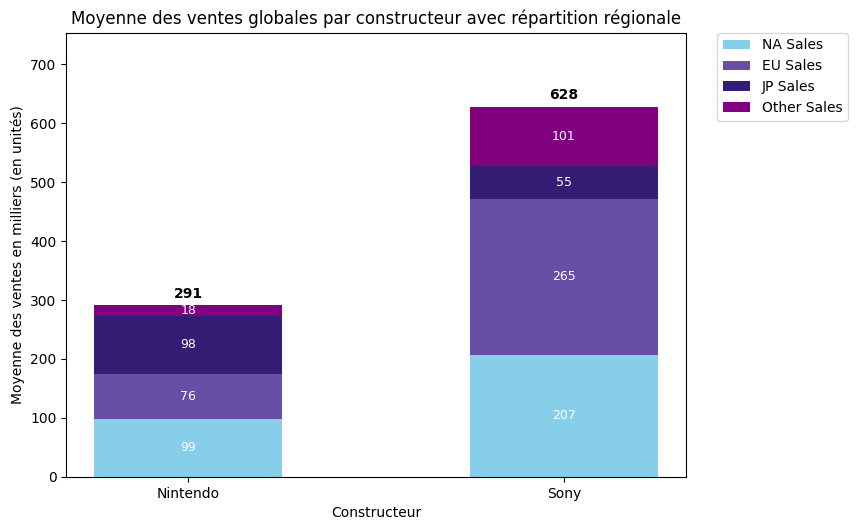

In [51]:
# Données pour les moyennes de ventes (en milliers pour une meilleure lisibilité)
mean_sales = mean_sales / 1000

# Constructeurs pour l'axe x et les données de ventes régionales
constructeurs = mean_sales.index.tolist()
na_sales = mean_sales['NA_Sales']
eu_sales = mean_sales['EU_Sales']
jp_sales = mean_sales['JP_Sales']
other_sales = mean_sales['Other_Sales']
global_sales = mean_sales['Global_Sales']

# Initialisation du graphique
plt.figure(figsize=(8, 6))
index = np.arange(len(constructeurs))
bar_width = 0.5

# Empilement des sections de ventes par région
bars_na = plt.bar(index, na_sales, bar_width, label='NA Sales', color='skyblue')
bars_eu = plt.bar(index, eu_sales, bar_width, bottom=na_sales, label='EU Sales', color='#674ea7')
bars_jp = plt.bar(index, jp_sales, bar_width, bottom=na_sales + eu_sales, label='JP Sales', color='#351c75')
bars_other = plt.bar(index, other_sales, bar_width, bottom=na_sales + eu_sales + jp_sales, label='Other Sales', color='purple')

# Ajouter les valeurs des ventes régionales au centre de chaque section
for bars, values in zip([bars_na, bars_eu, bars_jp, bars_other], [na_sales, eu_sales, jp_sales, other_sales]):
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, 
                 f'{value:,.0f}', ha='center', va='center', color='white', fontsize=9)

# Ajustement de la limite de l'axe y
plt.ylim(0, global_sales.max() * 1.2)

# Ajouter les annotations pour Global_Sales juste au-dessus de chaque colonne
for idx, (x, y) in enumerate(zip(index, global_sales)):
    plt.text(x, y + global_sales.max() * 0.02, f'{y:,.0f}', ha='center', color='black', weight='bold')

# Paramètres du graphique
plt.xlabel('Constructeur')
plt.ylabel('Moyenne des ventes en milliers (en unités)')
plt.title('Moyenne des ventes globales par constructeur avec répartition régionale')
plt.xticks(index, constructeurs)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Utilisation de `plt.subplots_adjust` pour une meilleure marge haute
plt.subplots_adjust(top=0.85)

plt.show()

In [52]:
# Compter le nombre d'occurrences de chaque éditeur
publisher_counts = df_filtered['Publisher'].value_counts()

# Identifier les éditeurs présents une seule fois
unique_publishers = publisher_counts[publisher_counts == 1]

# Afficher les éditeurs uniques s'il y en a
if not unique_publishers.empty:
    print("Les éditeurs présents une seule fois dans le dataframe sont :")
    print(unique_publishers.index.tolist())
else:
    print("Il n'y a aucun éditeur unique dans le dataframe.")

Les éditeurs présents une seule fois dans le dataframe sont :
['ASCII Media Works', 'Introversion Software', 'Big Ben Interactive', 'Otomate', 'Avanquest', 'Giga', 'Boost On', 'Minato Station', 'Epic Games', 'Views', 'Inti Creates', 'Microids', 'Comfort', 'imageepoch Inc.', 'Type-Moon', 'Marvelous Games', 'Seventh Chord', 'Hello Games', 'mixi, Inc', 'Trion Worlds', 'GungHo', 'Rebellion Developments', 'Acquire', 'Revolution Software', 'Sold Out', 'Insomniac Games', 'WayForward Technologies', 'Marvel Entertainment', 'FuRyu Corporation', 'Rocket Company', 'Asgard', 'Nitroplus']


In [53]:
# Identifier les éditeurs uniques
unique_publishers = publisher_counts[publisher_counts == 1].index

# Créer un nouveau DataFrame avec uniquement les éditeurs uniques
df_unique_publishers = df_filtered[df_filtered['Publisher'].isin(unique_publishers)]

df_unique_publishers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1119 to 16389
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          32 non-null     int64  
 1   Name          32 non-null     object 
 2   Platform      32 non-null     object 
 3   Year          32 non-null     int32  
 4   Genre         32 non-null     object 
 5   Publisher     32 non-null     object 
 6   Constructeur  32 non-null     object 
 7   Portable      32 non-null     object 
 8   NA_Sales      32 non-null     float64
 9   EU_Sales      32 non-null     float64
 10  JP_Sales      32 non-null     float64
 11  Other_Sales   32 non-null     float64
 12  Global_Sales  32 non-null     float64
dtypes: float64(5), int32(1), int64(1), object(6)
memory usage: 3.4+ KB


In [54]:
# Calculer la moyenne des ventes pour chaque constructeur sur toutes les colonnes Sales
mean_sales_by_unique_publishers = df_unique_publishers.groupby('Constructeur')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()

# Afficher le résultat
print("Moyenne des ventes pour chaque constructeur :\n", mean_sales_by_unique_publishers)

Moyenne des ventes pour chaque constructeur :
               NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Constructeur                                                         
Nintendo      0.006000  0.002475  0.143550     0.001250      0.153275
Sony          0.042625  0.044750  0.013288     0.016704      0.117367


In [55]:
# Convertir les valeurs en unités (plutôt qu'en millions) et arrondir
mean_sales_publishers = (mean_sales_by_unique_publishers * 1_000_000).round(0).astype(int)

# Afficher le résultat
print("Moyenne des ventes pour chaque constructeur (en unités) :\n", mean_sales_publishers)

Moyenne des ventes pour chaque constructeur (en unités) :
               NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Constructeur                                                         
Nintendo          6000      2475    143550         1250        153275
Sony             42625     44750     13288        16704        117367


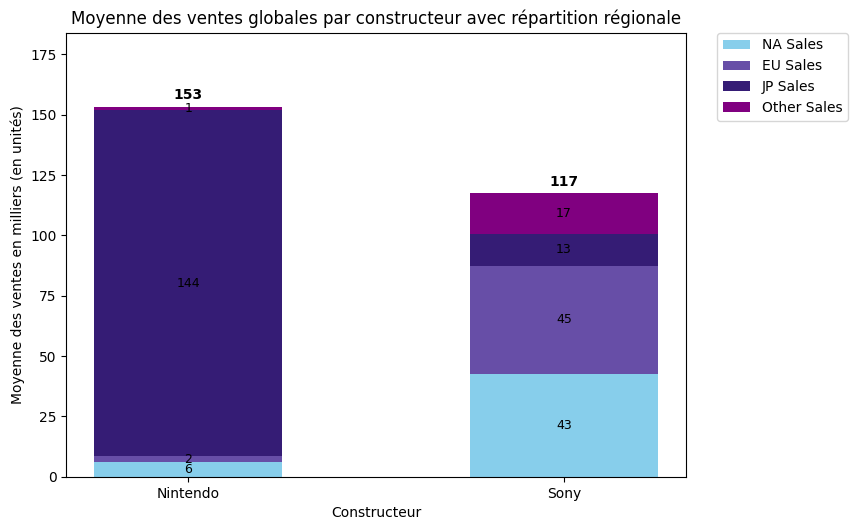

In [56]:
# Données pour les moyennes de ventes (en milliers pour une meilleure lisibilité)
mean_sales_publishers = mean_sales_publishers / 1000

# Constructeurs pour l'axe x et les données de ventes régionales
constructeurs = mean_sales_publishers.index.tolist()
na_sales = mean_sales_publishers['NA_Sales']
eu_sales = mean_sales_publishers['EU_Sales']
jp_sales = mean_sales_publishers['JP_Sales']
other_sales = mean_sales_publishers['Other_Sales']
global_sales = mean_sales_publishers['Global_Sales']

# Initialisation du graphique
plt.figure(figsize=(8, 6))
index = np.arange(len(constructeurs))
bar_width = 0.5

# Empilement des sections de ventes par région
bars_na = plt.bar(index, na_sales, bar_width, label='NA Sales', color='skyblue')
bars_eu = plt.bar(index, eu_sales, bar_width, bottom=na_sales, label='EU Sales', color='#674ea7')
bars_jp = plt.bar(index, jp_sales, bar_width, bottom=na_sales + eu_sales, label='JP Sales', color='#351c75')
bars_other = plt.bar(index, other_sales, bar_width, bottom=na_sales + eu_sales + jp_sales, label='Other Sales', color='purple')

# Ajouter les valeurs des ventes régionales au centre de chaque section
for bars, values in zip([bars_na, bars_eu, bars_jp, bars_other], [na_sales, eu_sales, jp_sales, other_sales]):
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, 
                 f'{value:,.0f}', ha='center', va='center', color='black', fontsize=9)

# Ajustement de la limite de l'axe y
plt.ylim(0, global_sales.max() * 1.2)

# Ajouter les annotations pour Global_Sales juste au-dessus de chaque colonne
for idx, (x, y) in enumerate(zip(index, global_sales)):
    plt.text(x, y + global_sales.max() * 0.02, f'{y:,.0f}', ha='center', color='black', weight='bold')

# Paramètres du graphique
plt.xlabel('Constructeur')
plt.ylabel('Moyenne des ventes en milliers (en unités)')
plt.title('Moyenne des ventes globales par constructeur avec répartition régionale')
plt.xticks(index, constructeurs)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Utilisation de `plt.subplots_adjust` pour une meilleure marge haute
plt.subplots_adjust(top=0.85)

plt.show()